#### How to write Yara rule for Nokoyawa ransomware

- In the frist, we will work with 3 files that shared by [zscaler](https://www.zscaler.com/blogs/security-research/nokoyawa-ransomware-rust-or-bust)



#### Introduction
Nokoyawa is a ransomware family that targets 64-bit Windows systems. It was first identified in February 2022 and is known for its use of double extortion tactics, which involve exfiltrating sensitive data from targeted organizations before encrypting files and demanding a ransom payment. The initial version of Nokoyawa was written in C programming language and used Elliptic Curve Cryptography (ECC) with SECT233R1 and Salsa20 for file encryption. In September 2022, a revised version of Nokoyawa was released, which was rewritten in Rust programming language and utilized ECC with Curve25519 and Salsa20 for file encryption. This new version, known as Nokoyama 2.0, includes a configuration parameter that can be passed via the command-line, providing threat actors with greater flexibility at runtime.

#### IOCs
- [7095beafff5837070a89407c1bf3c6acf8221ed786e0697f6c578d4c3de0efd6](https://www.virustotal.com/gui/file/7095beafff5837070a89407c1bf3c6acf8221ed786e0697f6c578d4c3de0efd6)
- [47c00ac29bbaee921496ef957adaf5f8b031121ef0607937b003b6ab2a895a12](https://www.virustotal.com/gui/file/47c00ac29bbaee921496ef957adaf5f8b031121ef0607937b003b6ab2a895a12)
- [259f9ec10642442667a40bf78f03af2fc6d653443cce7062636eb750331657c4](https://www.virustotal.com/gui/file/259f9ec10642442667a40bf78f03af2fc6d653443cce7062636eb750331657c4)


#### Loading sample with IDA pro 


I manually write Yara rules by using IDA Pro to load samples and examine their strings for unique characteristics relevant to a specific family. From this analysis, I can use the identified strings to craft effective Yara rules.

##### Strings with IDA 

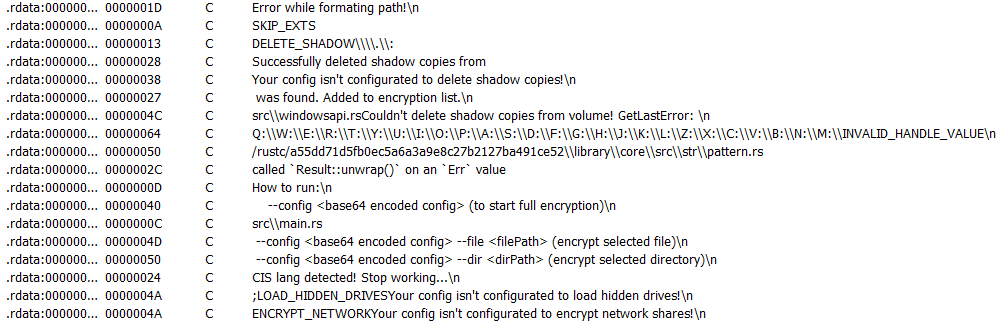

- "deps\\noko.pdb"
- "How to run:"
- "--config <base64 encoded config> (to start full encryption)"
- "--config <base64 encoded config> --file <filePath>" 
- "CIS lang detected! Stop working" 
- "config isn't configurated to load hidden drives" 
- "ENCRYPT_NETWORKYour config isn't configurated to encrypt network shares" 
- "Your config isn't configurated to delete shadow copies" 
- "Successfully deleted shadow copies"   

By analyzing strings of malware, we can extract relevant strings and use VirusTotal (if you have a premium account) to test them individually in order to select appropriate conditions for our rules

We can detect that the file "deps\noko.pdb" will be present in all samples because it is a member of the family of pdb files.
- PDB stands for "Program Database," and it is a file format used by Microsoft Visual Studio to store debugging information about a program. It contains information about the program's code, data, and resources, as well as details about the program's execution. PDB files are typically used by developers to debug their programs and fix errors. They can also be used by other tools, such as debugger programs, to analyze the code and execution of a program. PDB files are often associated with the .exe file of a program, and they are typically stored in a separate directory or folder.
- We can use the PDB as a condition for detecting the presence of the Nokoyawa family in a sample. If the Yara scan identifies PDB in the sample, it will be identified as belonging to the Nokoyawa family.

After testing each string individually, we discovered that the first four strings were present in three samples, while the remaining strings were present in only one sample. Based on this information, we can conclude that the first three strings are except to the PDB string, and can therefore be used to detect the presence of the three samples. Therefore, our condition will be as follows: ```uint16(0) == 0x5A4D and ($pdb or 3 of ($s*))```


#### [Our YARA rule](https://github.com/MalGamy/YARA_Rules/blob/main/Nokoyawa.yara)

```css
rule Nokoyawa_ransomware: Nokoyawa
{
    meta:
    description = "Detect_Nokoyawa_ransomware"
    author = "@malgamy12"
    date = "20/12/2022"
    license = "DRL 1.1"
        hash = "7095beafff5837070a89407c1bf3c6acf8221ed786e0697f6c578d4c3de0efd6"
        hash = "47c00ac29bbaee921496ef957adaf5f8b031121ef0607937b003b6ab2a895a12"
        hash = "259f9ec10642442667a40bf78f03af2fc6d653443cce7062636eb750331657c4"
  
                
    strings:
        
        $pdb = "deps\\noko.pdb" ascii
        $s1 = "How to run:" ascii
        $s2 = "--config <base64 encoded config> (to start full encryption)" ascii
        $s3 = "--config <base64 encoded config> --file <filePath>" ascii
        $s4 = "CIS lang detected! Stop working" ascii
        $s5 = "config isn't configurated to load hidden drives" ascii
        $s6 = "ENCRYPT_NETWORKYour config isn't configurated to encrypt network shares" ascii
        $s7 = "Your config isn't configurated to delete shadow copies" ascii
        $s8 = "Successfully deleted shadow copies from" ascii
        
    condition:
        uint16(0) == 0x5A4D and ($pdb or 3 of ($s*))
}
```

#### Testing 

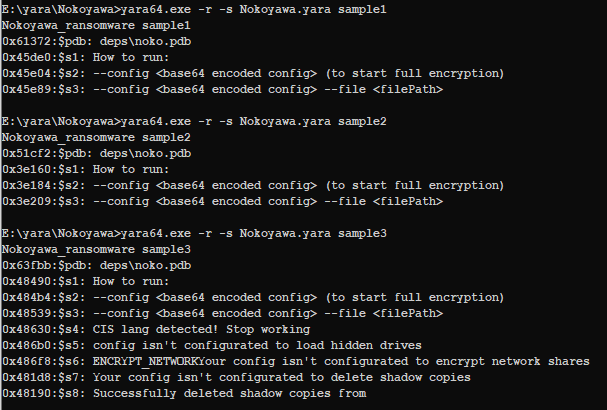

As depicted in the preceding figure, it appears that our condition is functioning as intended. After conducting testing, we can confidently assert that our rules are effective on our sample set.

#### [Hunting](https://www.hybrid-analysis.com/yara-search)

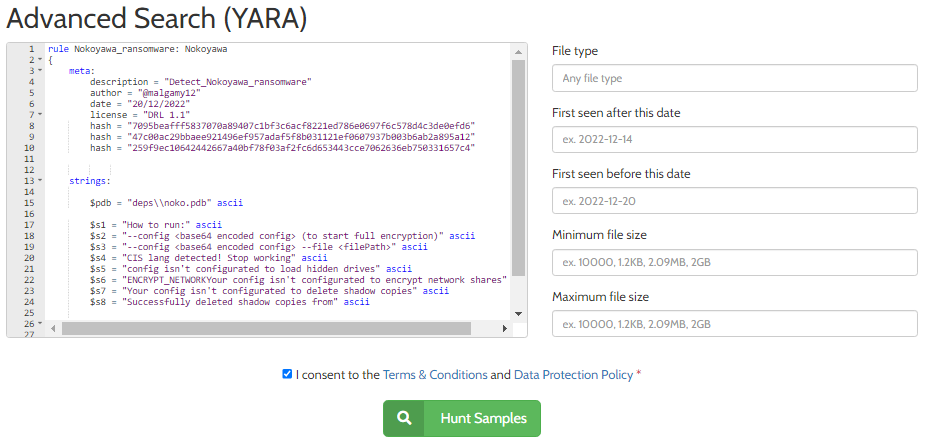

From the previous figure, we can see the results of our rules
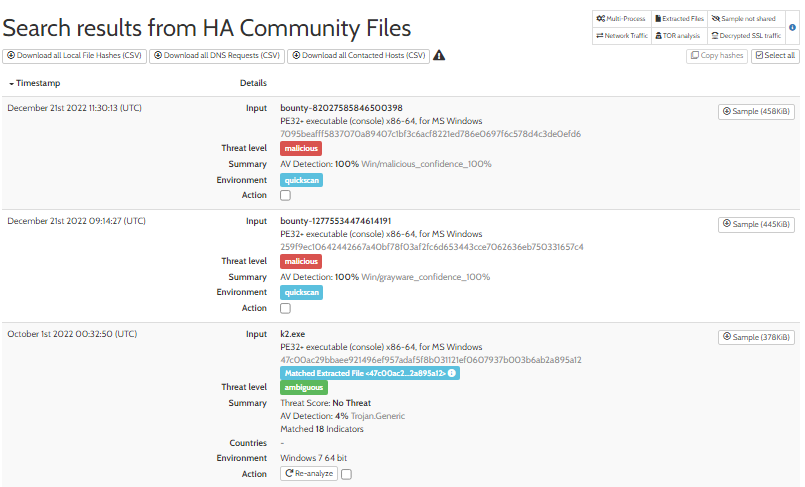

Thanks a lot for reading. You can find me into the following links
- [Twitter](https://twitter.com/MalGamy12)
- [Linkedin](https://www.linkedin.com/in/gameel-ali-8041161bb/)
- [Youtube](https://www.youtube.com/channel/UCdhYL47wLxxKOyaRsk4Moaw)
- [Github](https://github.com/MalGamy)